# EVT Modeling

Using historical returns of stocks from healthcare industry, I am going to try using lmoments package (Don't forget to pip install it) to fit distributions that may fit the stock returns.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.legend_handler import HandlerLine2D
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [12]:
data = pd.read_csv("stock_returns")
data.head()
#print data.dtypes

,date,ALXN Return,BIIB Return,BSX Return,EW Return,GILD Return
0,2019-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
1,2019-01-03 00:00:00+00:00,0.022030,0.007581,-0.044980,-0.037389,0.028531
2,2019-01-04 00:00:00+00:00,0.057779,0.036906,0.039502,0.035222,0.045977
3,2019-01-07 00:00:00+00:00,0.018302,0.012785,0.006139,0.006859,0.004542
4,2019-01-08 00:00:00+00:00,0.006207,0.006328,0.027891,0.019167,-0.006855


Choosing the Gilean returns to apply some distribution fitting

In [15]:
data.reset_index(level=0, inplace=True)
data.head()

,index,date,ALXN Return,BIIB Return,BSX Return,EW Return,GILD Return
0,0,2019-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
1,1,2019-01-03 00:00:00+00:00,0.022030,0.007581,-0.044980,-0.037389,0.028531
2,2,2019-01-04 00:00:00+00:00,0.057779,0.036906,0.039502,0.035222,0.045977
3,3,2019-01-07 00:00:00+00:00,0.018302,0.012785,0.006139,0.006859,0.004542
4,4,2019-01-08 00:00:00+00:00,0.006207,0.006328,0.027891,0.019167,-0.006855


In [19]:
type(data['date'].iloc[0])


pandas._libs.tslibs.timestamps.Timestamp

In [18]:
data['date'] = pd.to_datetime(data['date'])

In [22]:
data['Year'] = data['date'].apply(lambda time: time.year)
data['Month'] = data['date'].apply(lambda time: time.month)
data['Day'] = data['date'].apply(lambda time: time.day)

In [23]:
data.head()

,index,date,ALXN Return,BIIB Return,BSX Return,EW Return,GILD Return,Year,Month,Day
0,0,2019-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,2019,1,2
1,1,2019-01-03 00:00:00+00:00,0.022030,0.007581,-0.044980,-0.037389,0.028531,2019,1,3
2,2,2019-01-04 00:00:00+00:00,0.057779,0.036906,0.039502,0.035222,0.045977,2019,1,4
3,3,2019-01-07 00:00:00+00:00,0.018302,0.012785,0.006139,0.006859,0.004542,2019,1,7
4,4,2019-01-08 00:00:00+00:00,0.006207,0.006328,0.027891,0.019167,-0.006855,2019,1,8


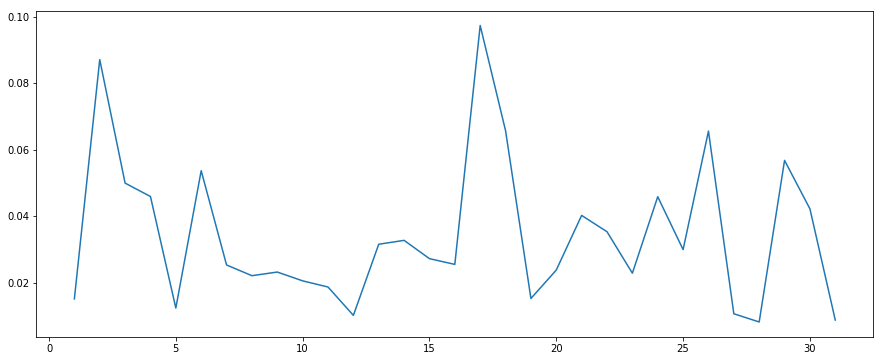

In [27]:
df = data.groupby("Day")['GILD Return'].max()
plt.plot(df)

In [28]:
LMU = lmoments.samlmu(df)
LMU

[0.03458434179887536,
 0.012231437503216484,
 0.25964129222140486,
 0.14458789702766237,
 0.06501021968586065]

### Fit different distributions

In [29]:
gevfit = lmoments.pelgev(LMU)
expfit = lmoments.pelexp(LMU)
gumfit = lmoments.pelgum(LMU)
weifit = lmoments.pelwei(LMU)
gpafit = lmoments.pelgpa(LMU)
pe3fit = lmoments.pelpe3(LMU)
gamfit = lmoments.pelgam(LMU)
glofit = lmoments.pelglo(LMU)

In [31]:
T = np.arange(0.1, 10.1, 0.1) + 1

# extreme precipitations
gevST = lmoments.quagev(1.0-1./T, gevfit)
expST = lmoments.quaexp(1.0-1./T, expfit)  
gumST = lmoments.quagum(1.0-1./T, gumfit)
weiST = lmoments.quawei(1.0-1./T, weifit)
gpaST = lmoments.quagpa(1.0-1./T, gpafit)
pe3ST = lmoments.quape3(1.0-1./T, pe3fit)
gamST = lmoments.quagam(1.0-1./T, gamfit)
gloST = lmoments.quaglo(1.0-1./T, glofit)

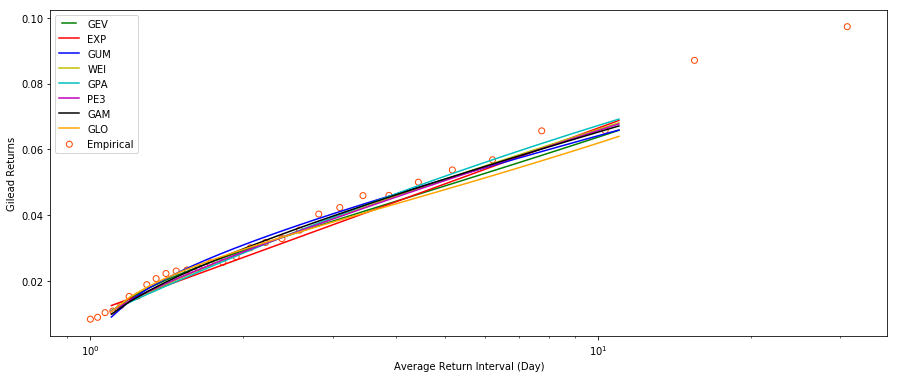

In [32]:
# setup plotting parameters
plt.xscale('log')
plt.xlabel('Average Return Interval (Day)')
plt.ylabel('Gilead Returns')

# draw extreme values from GEV distribution
line1, = plt.plot(T, gevST, 'g', label='GEV')
line2, = plt.plot(T, expST, 'r', label='EXP')
line3, = plt.plot(T, gumST, 'b', label='GUM')
line4, = plt.plot(T, weiST, 'y', label='WEI')
line5, = plt.plot(T, gpaST, 'c', label='GPA')
line6, = plt.plot(T, pe3ST, 'm', label='PE3')
line7, = plt.plot(T, gamST, 'k', label='GAM')
line8, = plt.plot(T, gloST, c='orange', label='GLO')

# draw extreme values from observations(empirical distribution)
N    = np.r_[1:len(df.index)+1]*1.0 #must *1.0 to convert int to float
Nmax = max(N)

plt.scatter(Nmax/N, sorted(df)[::-1], color = 'orangered', facecolors='none', label='Empirical')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})

### The question here is how to select the optimal distribution???